In [1]:
pip install mlbgame

In [2]:
import mlbgame #import MLB API used for passing scores for prediction
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #used for splitting data into training and testing 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

In [3]:
# load dataset
data = pd.read_csv("data.csv")
print(data)

                  away_team             home_team  Delta (ERA)  Delta (RBI)  \
0             New York Mets    Kansas City Royals         0.64           -9   
1     Philadelphia Phillies       Cincinnati Reds         0.28          104   
2           Minnesota Twins     Baltimore Orioles        -0.86           20   
3      Washington Nationals        Atlanta Braves         1.00         -120   
4          Colorado Rockies  Arizona Diamondbacks         0.18          -96   
...                     ...                   ...          ...          ...   
2458      Toronto Blue Jays        Tampa Bay Rays         0.42          -81   
2459    St. Louis Cardinals    Pittsburgh Pirates         0.13          -49   
2460   San Francisco Giants     Milwaukee Brewers         0.43          -34   
2461         Detroit Tigers         Miami Marlins        -0.19          -93   
2462         Boston Red Sox     Cleveland Indians        -0.16         -103   

      Delta (SLG)  Delta (AVG)  home_team_win  
0  

In [4]:
#split dataset into independent and dependent variables
independent_cols = ['Delta (ERA)', 'Delta (RBI)', 'Delta (SLG)', 'Delta (AVG)']
X = data[independent_cols] # independent variables
y = data.home_team_win # Dependent variable
print(y)

0       1
1       1
2       1
3       0
4       0
       ..
2458    0
2459    1
2460    1
2461    0
2462    1
Name: home_team_win, Length: 2463, dtype: int64


In [5]:
# split X and y into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [6]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data from the training set 
finalPrediction = logreg.fit(X_train,y_train)

# prediction done by using the X_test data set 
y_pred=logreg.predict(X_test)

In [7]:
# confusion matrix used to test the accuracy precision of the prediction 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[118 107]
 [ 87 181]]


Text(0.5, 257.44, 'Predicted label')

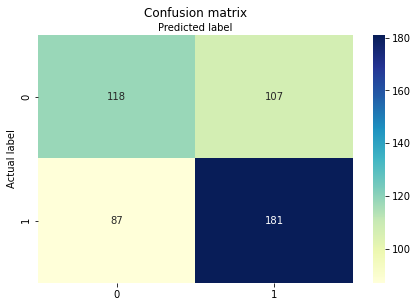

In [8]:
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap for data set 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [9]:
print("Accuracy:","{:.3%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision:","{:.3%}".format(metrics.precision_score(y_test, y_pred)))
print("Recall:","{:.3%}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 60.649%
Precision: 62.847%
Recall: 67.537%


In [10]:
print(X_test)
x2 = np.array([-0.42, -71, -0.044, 0.004])
y = x2.reshape(1,4)
prediction = logreg.predict(y)
print(prediction)

      Delta (ERA)  Delta (RBI)  Delta (SLG)  Delta (AVG)
947         -0.02          -56       -0.025       -0.008
741          0.12          -41        0.000       -0.015
2205        -0.27           85        0.043        0.021
642         -0.70           18       -0.006        0.001
1694         0.14          -42        0.009       -0.004
...           ...          ...          ...          ...
2309        -0.18          -30        0.005       -0.003
1701         0.48          151        0.067        0.040
903          0.55         -171       -0.058       -0.015
389          1.06          -75       -0.033       -0.006
409         -0.98          -34       -0.011        0.006

[493 rows x 4 columns]
[1]


In [11]:
def measure_accuracy(independent_column):
    X = data[independent_column] # independent variables
    y = data.home_team_win # Dependent variable
    
    # split X and y into training and testing sets
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
    
    # instantiate the model (using the default parameters)
    logreg = LogisticRegression()

    # fit the model with data from the training set 
    finalPrediction = logreg.fit(X_train,y_train)

    # prediction done by using the X_test data set 
    y_pred=logreg.predict(X_test)
    
    print(independent_column[0])
    print("Accuracy:","{:.3%}".format(metrics.accuracy_score(y_test, y_pred)))
    print("Precision:","{:.3%}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall:","{:.3%}".format(metrics.recall_score(y_test, y_pred)))
    print()

In [13]:
measure_accuracy(['Delta (ERA)'])
measure_accuracy(['Delta (RBI)'])
measure_accuracy(['Delta (SLG)'])
measure_accuracy(['Delta (AVG)'])

Delta (ERA)
Accuracy: 56.795%
Precision: 57.738%
Recall: 73.208%

Delta (RBI)
Accuracy: 56.592%
Precision: 56.941%
Recall: 76.426%

Delta (SLG)
Accuracy: 55.172%
Precision: 55.649%
Recall: 96.727%

Delta (AVG)
Accuracy: 54.158%
Precision: 54.158%
Recall: 100.000%

